In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes
       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000         4.800000   65238.000000
75%     21.750000         7.800000  100545.750000
max     29.000000        10.600000  122392.000000
YearsExperience    False
Salary             False
dtype: bool


C:\Users\Manu\AppData\Local\Temp\ipykernel_18780\1434765228.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


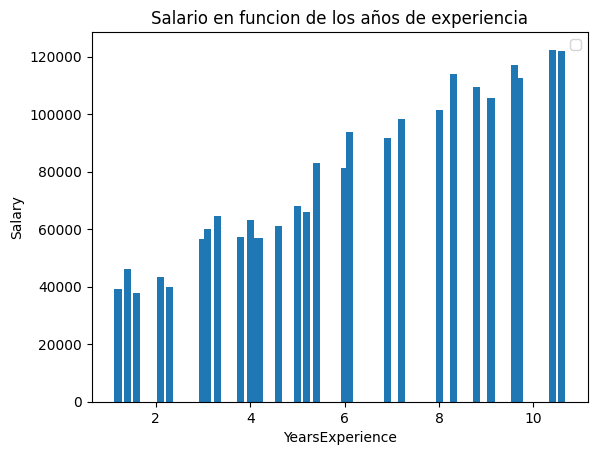

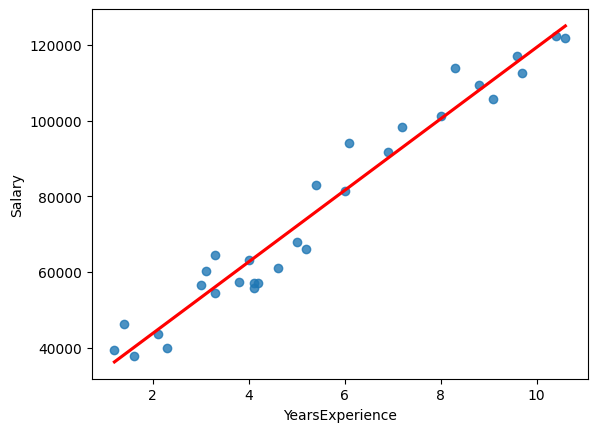

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


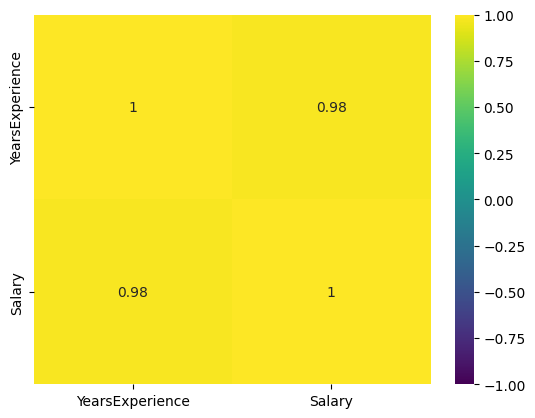

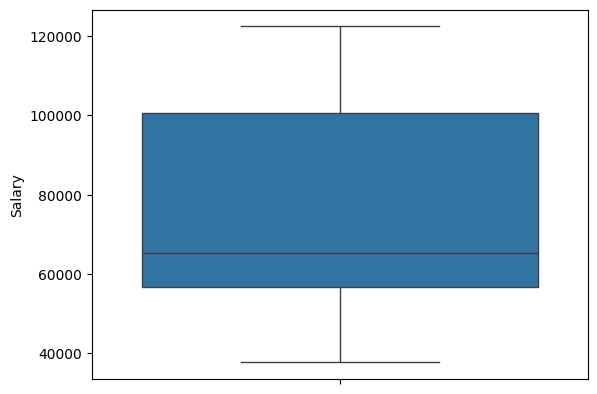

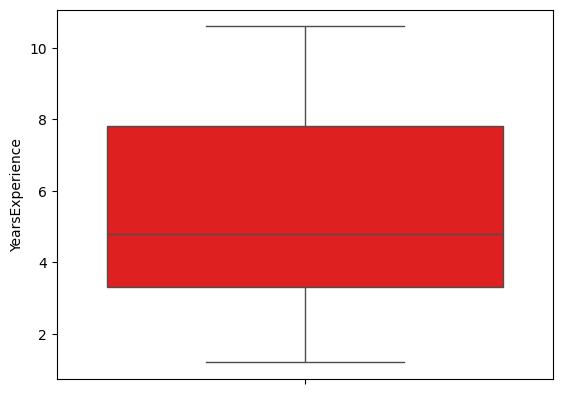

Mae:6286.45
R2:0.90
RMSE:79.29


0.9024461774180498

In [93]:



df = pd.read_csv("Salary_dataset.csv")
df.columns
df.info()
df.describe()
print(df.describe())
df = df.drop( 'Unnamed: 0', axis=1)
print(df.isna().any())
plt.bar(df['YearsExperience'],df['Salary'],width=0.15)
plt.xlabel("YearsExperience")
plt.ylabel('Salary')
plt.legend()
plt.title('Salario en funcion de los años de experiencia')
plt.show()
sns.regplot(x=df['YearsExperience'],y=df['Salary'],ci=None,line_kws={'color':'red'})
plt.show()
matriz = df.corr()
print(matriz)
sns.heatmap(matriz,cmap = 'viridis',vmin=-1,vmax=1,annot=True)
plt.show()
sns.boxplot(df['Salary'])
plt.show()
sns.boxplot(df['YearsExperience'],color="Red")
plt.show()
X = df.drop(columns= "Salary")
y = df.drop(columns = "YearsExperience")
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train,y_train)
y_pred = regresion_lineal.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_absolute_error(y_test,y_pred))
print(f"Mae:{mae:.2f}\nR2:{r2:.2f}\nRMSE:{rmse:.2f}")
regresion_lineal.score(X_test,y_test)












In [ ]:
df = pd.read_csv("salary.csv")
df.columns

df.isna().any()
df = df.dropna()
df.info()
df.describe()









<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [ ]:

variables_trabajar = pd.DataFrame(df,columns=['Years of Experience','Salary'])
correlaciones = variables_trabajar['Years of Experience'].corr(variables_trabajar['Salary'])

print('porcentaje de correlaciones',correlaciones)
X = pd.DataFrame(variables_trabajar['Years of Experience'])

Y = pd.DataFrame(variables_trabajar['Salary']) 


x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

regresion_lineal = LinearRegression()
regresion_lineal.fit(x_train, y_train)
y_pred = regresion_lineal.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_absolute_error(y_test,y_pred))
print(f"mae:{mae:2f}\nr2:{r2:2f}\nrmse:{rmse:2f}")









porcentaje de correlaciones 0.8089681695139435
mae:25054.111457
r2:0.655597
rmse:158.284906


# El mae alto  indica que el  rendimiento  del modelo no es lo suficiente preciso y las predicciones no estan cerca de los datos reales 
# El r2 determina  que el modelo no es capaz de explicar toda la variabilidad de  los datos 
# el rmse  indica que los valores atipicos no los termina de predecir bien 
# Esto determina  que a lo mejor una regresion lineal no es apta para este tipo de hipotesis y quizas deberiamos cambiar a una regresion lineal multiple   debido a que otras variables pueden ser  factorews determinantes para predecir el salario en funcion de los años de experiencia tras explorar el dataset se ha observado que hay varias columnas que podrian ser aptas para este tipo de algoritmo 